# Why are distances so big in the 19c?

We could investigate several different kinds of distance. But since they all follow the same historical trend line, let's look at ingenre distances first.

In [43]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
from matplotlib import pyplot as plt
%matplotlib inline

In [28]:
data = pd.read_csv('annotated_loc_results.tsv', sep = '\t')
data.head()

,genre,firstdoc,genrematch,firstlength,matchlength,othermatchA,othermatchB,firstdate,matchdate,datediff,meandate,ingenredist,fullrandomdist,othergenredist,fullrandomdiff,othergenrediff,randommatchA,randommatchB
0,fairy tales,pst.000046338662,mdp.39015066409874,12.518752,39.835569,mdp.39015010739897,mdp.39015030741972,1945,1940,5,1942.5,0.025121,0.096274,0.140167,0.071152,0.115046,inu.32000007175351,mdp.39015028871948
1,war stories,uc2.ark+=13960=t0pr7pd59,uc2.ark+=13960=t9k35qk2r,11.357102,1.746841,uc1.b4698027,uc1.b4698027,1915,1915,0,1915.0,0.136093,0.127620,0.136494,-0.008473,0.000402,njp.32101038061105,njp.32101038061105
2,science fiction,uc1.32106002161542,mdp.39015000353519,8.138322,12.867202,inu.39000001857015,mdp.39015061861616,1976,1980,4,1978.0,0.034689,0.071031,0.147018,0.036342,0.112329,mdp.39015003676528,mdp.39015005689982
3,adventure stories,mdp.39015078576348,nyp.33433082539770,0.501181,9.481420,uc2.ark+=13960=t5p84564b,nyp.33433076024060,1900,1899,1,1899.5,0.236711,0.198285,0.182778,-0.038426,-0.053932,uc2.ark+=13960=t0pr7pc1x,mdp.39015050777518
4,history,mdp.39015037286500,mdp.39015059119779,17.712046,13.349847,inu.30000092854615,inu.30000056018702,1995,2004,9,1999.5,0.108611,0.101674,0.113914,-0.006937,0.005303,mdp.39015059138464,mdp.39015034533375


## Could it just be that distances will tend to be longer when texts are short?

Short texts will have fewer words, and may therefore have a greater chance to be unusual because of random variation. "Unusual" objects will tend to be outliers, and will have greater angular (cosine) distance from most of the other texts.

I don't have the raw lengths of texts in words handy in this dataset. But I do have the sums of the tf-idf vectors. And since the normalizing term (idf) is the same for all the documents, these will be proportional to document length.

In [46]:
data = data.assign(totallength = data.firstlength + data.matchlength)
data = data.assign(lengthsquare = data.firstlength * data.matchlength)

In [30]:
pearsonr(data.ingenredist, data.totallength)

(-0.20242461871660863, 1.739039472757253e-84)

In [47]:
pearsonr(data.ingenredist, data.lengthsquare)

(-0.19276393788274027, 1.2127786564084001e-76)

Yes, there is a (negative) correlation between length and distance. Maybe in our next experiment we should exclude very short books, randomly down-sample long books, and try to ensure that median document length is roughly consistent across the timeline. That might remove a source of noise and distortion in our data!

But could this explain the dramatic decline in median distance we saw from the late 19c to the mid 20c?

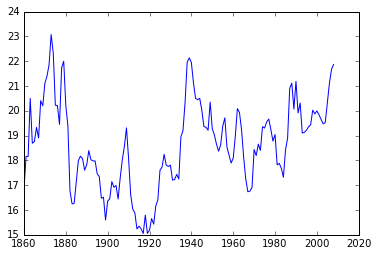

In [45]:
dates = []
medians = []
for yr in range(1860, 2009):
    thismedian = np.median(data.loc[(data.meandate > yr - 2) & (data.meandate < yr + 2), 'totallength'])
    dates.append(yr)
    medians.append(thismedian)

plt.plot(dates, medians)
plt.show()

Probably not. The trend is very different. If this was the cause of the downtrend we would expect to see distances peak 1880-1930 or so, and that's not at all what we see.

![raw distances](rplots/rawdistances.jpg)

## Let's inspect extreme examples.

Let's get some of the rows with biggest distances and look at the pairs of volumes.

In [31]:
earlydf = data.loc[data.meandate < 1910, :]
earlydf = earlydf.sort_values(by = 'ingenredist')
top25 = earlydf.iloc[-25 : , ]
top25 = top25.loc[ : , ['genre', 'firstdoc', 'genrematch', 'ingenredist', 'meandate', 'totallength']]
fullmeta = pd.read_csv('/Users/tunder/Dropbox/python/noveltmmeta/metadata/titlemeta.tsv', index_col = 'docid', sep = '\t', low_memory = False)
fullmeta = fullmeta.loc[~fullmeta.index.duplicated(keep = 'first'), :]
title1 = fullmeta.loc[top25.firstdoc, 'title']
top25 = top25.assign(firsttitle = title1.values)
top25 = top25.assign(secondtitle = fullmeta.loc[top25.genrematch, 'title'].values)
top25

,genre,firstdoc,genrematch,ingenredist,meandate,totallength,firsttitle,secondtitle
1094,tales,inu.39000005757559,mdp.39015018334048,0.460512,1877.0,17.179290,Eastern fairy legends current in southern Indi...,"Uncle Remus, his songs and his sayings; : | th..."
2874,folklore,uc2.ark+=13960=t2f767525,uc2.ark+=13960=t3zs2m43p,0.462274,1904.5,12.514764,Told by Uncle Remus;,The stories of El Dorado
7928,tales,inu.39000005759852,uc2.ark+=13960=t2f767525,0.465832,1905.5,20.515684,The most delectable nights of Straparola of Ca...,Told by Uncle Remus;
7324,folklore,inu.39000005767160,mdp.39015018334048,0.466001,1883.5,7.382435,Indian fables.,"Uncle Remus, his songs and his sayings; : | th..."
2179,folklore,nyp.33433074863303,mdp.39015000551872,0.472148,1887.5,16.244194,"Scotch stories : | or, The chronicles of Keckl...",Nights with Uncle Remus; | myths and legends o...
4762,tales,nyp.33433074864947,mdp.39015018334048,0.473781,1876.5,11.288511,Tales and traditions of Ayrshire and Galloway.,"Uncle Remus, his songs and his sayings; : | th..."
8927,tales,nyp.33433074864947,mdp.39015018334048,0.473781,1876.5,11.288511,Tales and traditions of Ayrshire and Galloway.,"Uncle Remus, his songs and his sayings; : | th..."
962,imaginary voyages,mdp.39076002212863,mdp.39015078556407,0.474236,1900.0,0.904824,On the way there / | a wonder tale for boys an...,Robinson Crusoe.
3319,imaginary voyages,mdp.39015078556407,mdp.39076002212863,0.474236,1900.0,0.904824,Robinson Crusoe.,On the way there / | a wonder tale for boys an...
8921,folklore,uc2.ark+=13960=t2f767525,mdp.39015012057413,0.482286,1905.5,31.111567,Told by Uncle Remus;,The Pawnee; | mythology (Part I) | $c: Collect...


**Observations:** It's notable that examples tend to come from folklore, fairy tales, and imaginary voyages. Some of them are juvenile fiction, and many of the pairs have at least one book written in dialect. For instance, the Uncle Remus stories, very prominent here, are written in a version of African-American dialect:

“Bimeby, one day, atter Brer Fox bin doin’ all dat he could fer ter ketch Brer Rabbit, en Brer Rabbit bein doin’ all he could fer ter keep ’im fum it, Brer Fox say to hisse’f dat he’d put up a game on Brer Rabbit, en he ain’t mo’n got de wuds out’n his mouf tewl Brer Rabbit came a lopin’ up de big road, lookin’ des ez plump, en ez fat, en ez sassy ez a Moggin hoss in a barley-patch.

*Plantation Bird Legends* are similar. Obviously dialect is going to distort word frequencies! Some common words will be greatly underrepresented because they are systematically misspelled. And although dialect is especially extreme in folktales, it may be common in other genres of 19c fiction as well. For instance British novels often use dialect to represent the speech of characters from Ireland, Scotland, or provincial corners of England. We do that much less now!

In [32]:
latedf = data.loc[data.meandate > 1950, :]
latedf = latedf.sort_values(by = 'ingenredist')
top25 = latedf.iloc[-25 : , ]
top25 = top25.loc[ : , ['genre', 'firstdoc', 'genrematch', 'ingenredist', 'meandate', 'totallength']]
fullmeta = pd.read_csv('/Users/tunder/Dropbox/python/noveltmmeta/metadata/titlemeta.tsv', index_col = 'docid', sep = '\t', low_memory = False)
fullmeta = fullmeta.loc[~fullmeta.index.duplicated(keep = 'first'), :]
top25 = top25.assign(firsttitle = fullmeta.loc[top25.firstdoc, 'title'].values)
top25 = top25.assign(secondtitle = fullmeta.loc[top25.genrematch, 'title'].values)
top25

,genre,firstdoc,genrematch,ingenredist,meandate,totallength,firsttitle,secondtitle
1287,western stories,uc1.31822031029762,mdp.39015004096221,0.301263,1976.5,12.182331,A miner's Sunday from the Writer's California ...,Leaving Cheyenne.
2657,fairy tales,pst.000021749254,inu.30000065119624,0.302011,1995.5,10.054107,The story of the Nutcracker / | $c: from a fai...,Scottish folk and fairy tales / | $c: selected...
7354,tales,inu.39000005566182,inu.39000005743062,0.302171,1979.5,5.313064,Tales of Mozambique.,Bwaidoka tales / | $c: collected and translate...
5757,legends,inu.30000078419524,mdp.39015051434291,0.308587,2000.0,33.423267,The legend of the fourth king / | $c: Edzard S...,One thousand one Papua New Guinean nights : | ...
5834,fairy tales,pst.000021749254,mdp.39015052441386,0.312276,1994.5,16.648935,The story of the Nutcracker / | $c: from a fai...,Blue fairy book / | $c: ed. Andrew Lang.
4457,tales,mdp.39015011804542,inu.39000005743062,0.315534,1982.0,17.817839,Irish folktales / | $c: edited by Henry Glassie.,Bwaidoka tales / | $c: collected and translate...
1183,humor,mdp.39076002515349,mdp.39015061865609,0.318667,1999.0,1.281008,The magic pretzel / | $c: by Daniel and Jill P...,"They call me Mad Dog! : | a story for bitter, ..."
6647,folklore,uc1.32106011030027,mdp.39015032486246,0.319178,1991.5,6.630942,The strange bride / | $c: Grace Ogot ; transla...,Chinye : | a West African folk tale / | $c: re...
8015,fairy tales,mdp.39015032277991,pst.000063594218,0.332676,1996.5,12.342893,"Black thorn, white rose / | $c: edited by Elle...",Disney's Mickey Mouse stories / | $c: with an ...
8276,fairy tales,inu.30000056018702,pst.000021749254,0.339149,1993.0,6.690463,Seven tales and a fable / | $c: Gwyneth Jones.,The story of the Nutcracker / | $c: from a fai...


The same genres are represented here, but with lower ingenre distances overall. I suspect dialect is one piece of the reason.

It might also be true that these genres (fairy tales and folklore) represent a smaller slice of our corpus in the late 20c than they did the 19c.

There are also probably other reasons for the greater distances in the 19c. Archaic and elevated diction may be more common than it is now. The corpus may also have more juvenile fiction than it does later in the 20c. We might be able to get at some of the causes by looking at individual words.